In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data.shape

(158, 12)

In [5]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
data.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
97,Dominican Republic,Latin America and Caribbean,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305
91,Morocco,Middle East and Northern Africa,92,5.013,0.03420,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
58,Belarus,Central and Eastern Europe,59,5.813,0.03938,1.03192,1.23289,0.73608,0.37938,0.19090,0.11046,2.13090


# EDA

### Checking Null values

In [7]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

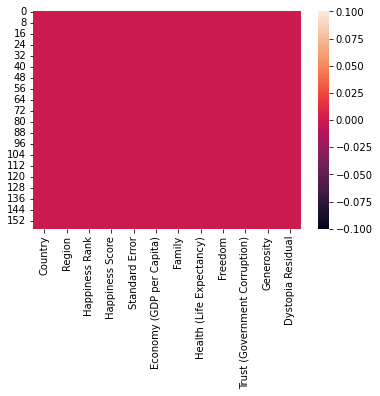

In [8]:
sns.heatmap(data.isnull())

  - There is no null values present in dataset.

### Checking all information of dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

 - No null values present.
 - Datatype is ok with respective their column.

# Visualization of the data

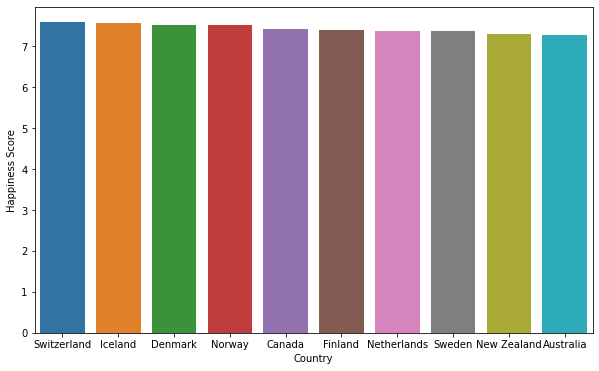

In [10]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="Happiness Score",ascending=False).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_good)
plt.show()

 - It is a top 10 countries whose having good Happiness Score.

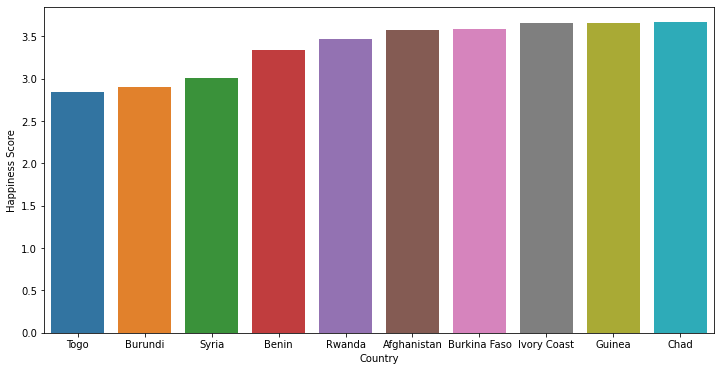

In [11]:
plt.figure(figsize=(12,6))
df_bad = data.sort_values(by="Happiness Score",ascending=True).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_bad)
plt.show()

  - Top 10 Poor Performing countries having poor Happiness Score.

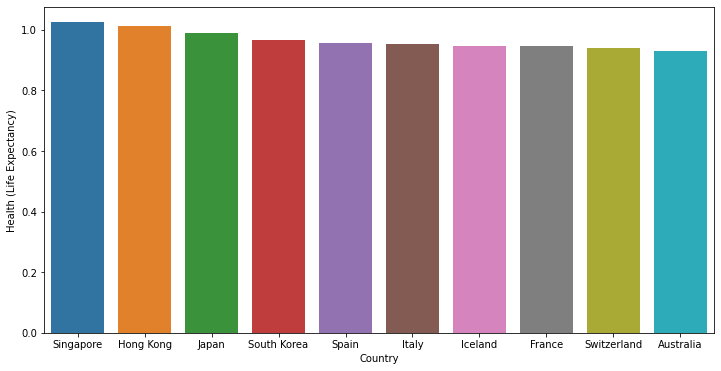

In [12]:
# top countries have high life expectency
plt.figure(figsize=(12,6))
df_bad = data.sort_values(by="Health (Life Expectancy)",ascending=False).iloc[0:10,:]
sns.barplot(x="Country",y="Health (Life Expectancy)",data=df_bad)
plt.show()

 - As we see that, Countries whose have Good Happiness Score Where Life Expectency is high.
 - This is a top 10 countries, have life expectency high.

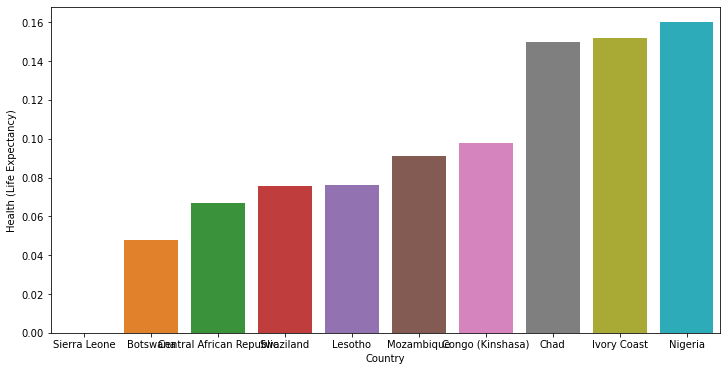

In [13]:
# bottom top 10 contries have low life expectency
plt.figure(figsize=(12,6))
df_bad = data.sort_values(by="Health (Life Expectancy)",ascending=True).iloc[0:10,:]
sns.barplot(x="Country",y="Health (Life Expectancy)",data=df_bad)
plt.show()

 - Top 10 countries have life expectency low.

In [14]:
gdp_region = data.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

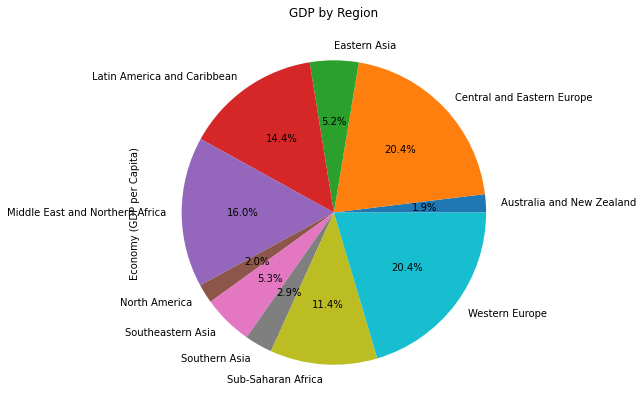

In [15]:
plt.figure(figsize=(10,7))
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.show()

 - Western Europe and Central and Eastern Europe is contributing each 20.4% of GDP.

In [16]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

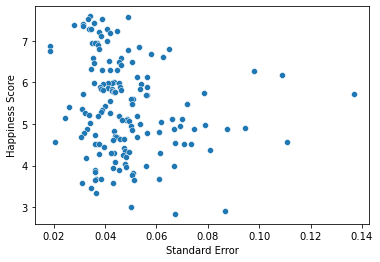

In [17]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=data)

  - The Range of Standard Error 0.03 to 0.07 have more Happiness Score.

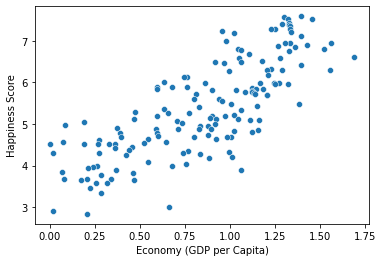

In [18]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=data)
plt.show()

  - Economy and Happiness Score have a linear relationship.
  - It means,When Ecomony (GDP per capita) increases then Happiness Score also increases.
  - Those Countries have more Economy(GDP per capita), they are spending alot and their Happiness Score is high

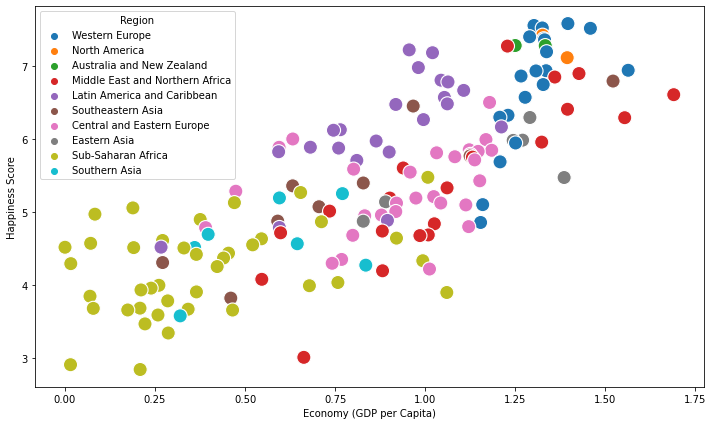

In [19]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',hue='Region', s=200, data=data)
plt.show()

 - Countries from western Europe have highest happiness Score and GDP per capita also highest.
 - Region from Sub-Sahara Africa contries have low happiness score and low GDP per capita

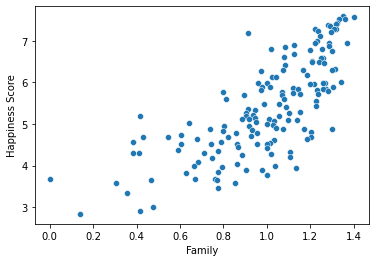

In [20]:
sns.scatterplot(x='Family',y='Happiness Score',data=data)
plt.show()

 - Family and Happiness Score have a linear relationship.
 - Families lies in the range 0.4 to 1.4 have good Happiness Score.

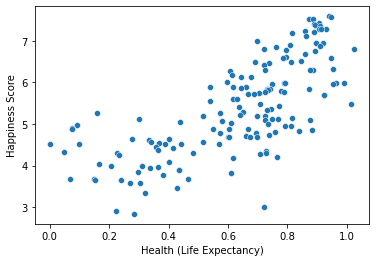

In [21]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=data)
plt.show()

 - It also Have linear RelationShip with each Other.
 - It shows that, those countries are spending on their Health, their Life Expectancy also increase.
 - The Health (Life Expectancy) lies in the range of 0.2 to 1.0 have good Happiness Score.

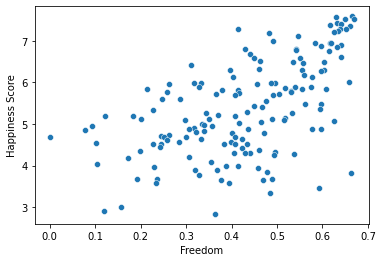

In [22]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=data)
plt.show()

 - The Freedom lies in the range of 0.2 to 0.7 have Good Happiness Score.

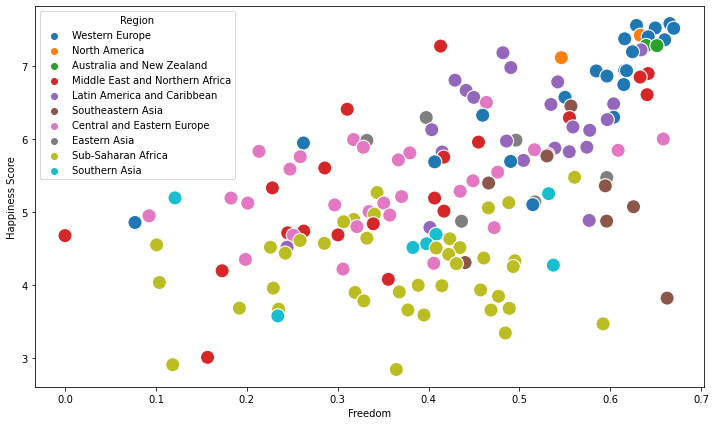

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Freedom',y='Happiness Score',hue='Region',s=200, data=data)
plt.show()

 - Countries lies in Western Europe have freedom more than other and have happines Score more.
 - Countries lies in Sub-Saharan Africa have Freedom descent and Happiness Score also Low.
 

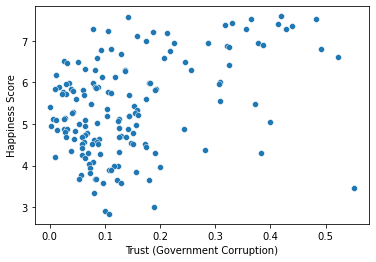

In [24]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=data)
plt.show()

 - The Trust (Goverment Corruption) range is 0.0 to 0.25 have more Happiness Score.

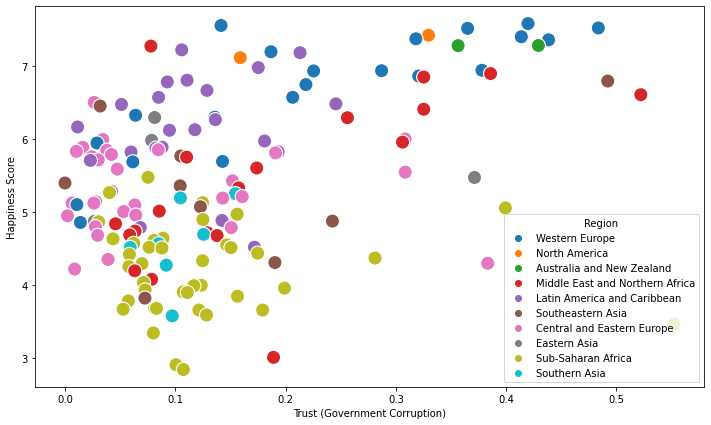

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',hue='Region',s=200, data=data)
plt.show()

- The Countries has greter Happiness Score they have low Trust (Government Corruption).

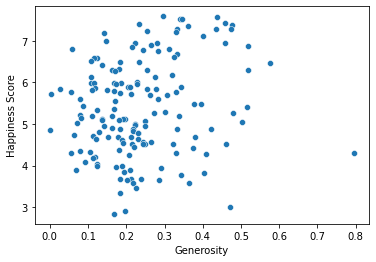

In [26]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=data)
plt.show()

 - The Generosity range is 0.1 to 0.5 have more Happiness Score.

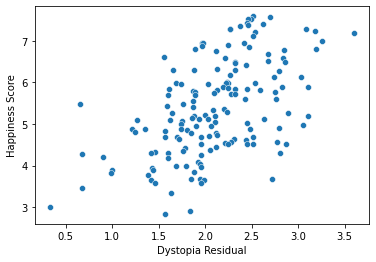

In [27]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=data)
plt.show()

 - The Dystopia Residual range 1.3 to 3.3 have more Happiness Score.
 - It is have a linear relation. 

## Encoding of DataFrame

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data['Region']=oe.fit_transform(data['Region'].values.reshape(-1,1))
data['Country']=oe.fit_transform(data['Country'].values.reshape(-1,1))
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Describe the dataset

In [29]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


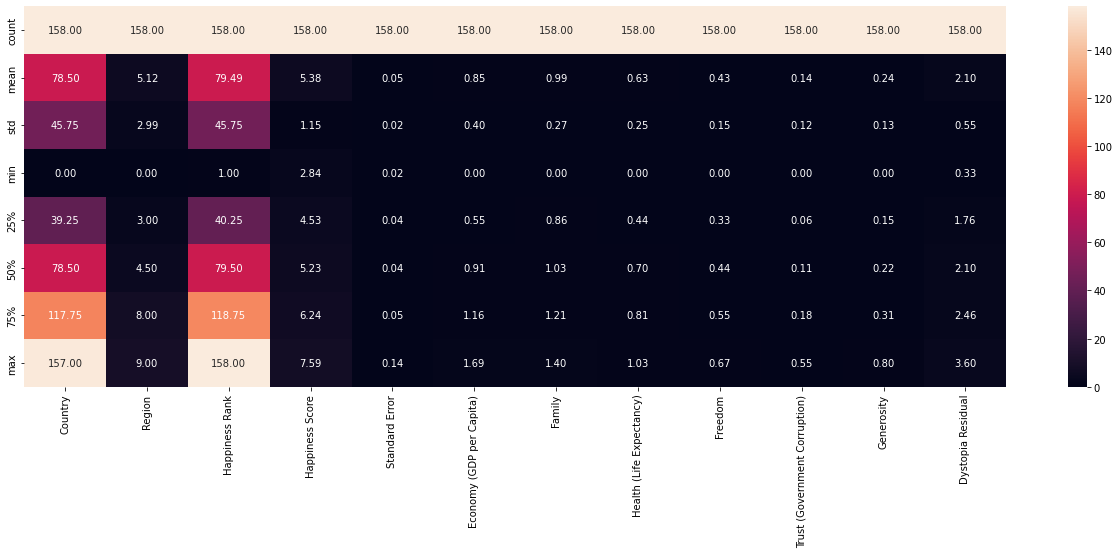

In [30]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(), annot=True, fmt="0.2f")
plt.show()

## Outcome of describe of datasets:

From the above plotting we are determining mean, standard deviation, minimum, and maximum value of each column. It helps us further in data cleaning.

- Country, Region are contain categorical data.
- Happiness Rank is contain ordinal data.

Total Number of row in the datasets:
  1. 158 rows
  2. 12 columns
  
Standard Error:
  1. Mean= 0.047885
  2. std = 0.403121
  3. max_value = 0.136930
  
Economy (GDP per Capita):
  1. Mean = 0.846137	
  2. std = 0.403121
  3. max_value = 1.690420	
  4. min_value = 0
  
Family:
  1. Mean = 0.991046
  2. std = 0.272369	
  3. max_vakue = 1.402230	
  4. min_value = 0.0000
  
Health (Life Expectancy):
  1. Mean = 0.630259		
  2. std = 0.247078	
  3. max_value = 1.025250	
 
 
Freedom:
  1. Mean = 0.428615	
  2. std = 0.150693	
  3. max_value = 0.669730	
  4. min_value = 0
  
Trust (Government Corruption):
  1. Mean = 0.143422
  2. std = 0.120034
  3. max_value = 0.551910
  4. min_value = 0
  
Generosity:
  1. Mean = 0.237296
  2. std = 0.126685
  3. max_value = 0.795880	
  4. min_value = 0
  
Dystopia Residual:
  1. Mean = 2.098977
  2. std = 0.553550
  3. max_value = 3.602140
  4. min_value = 0.328580
  

## Correlation of the features with target column

In [31]:
data.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

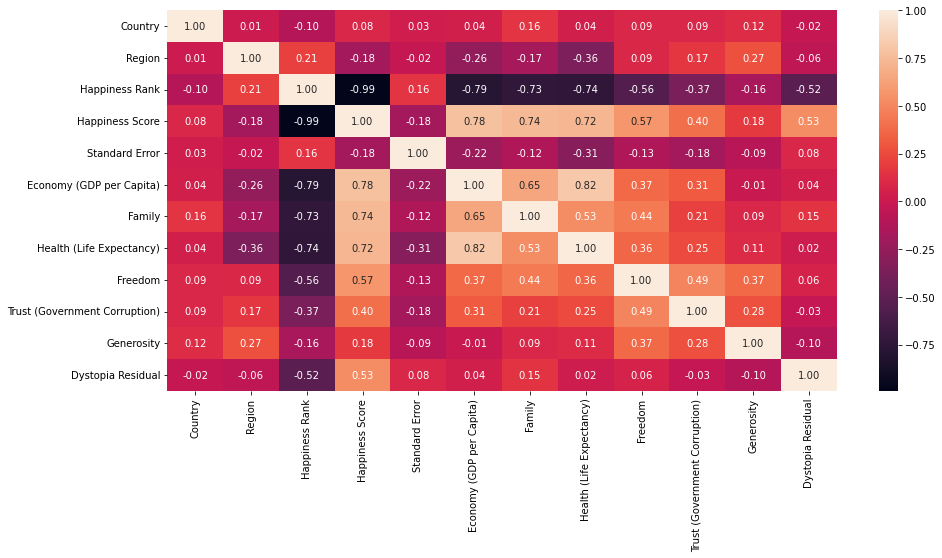

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation:

  1. Country has 8% positive correlation with the target column.
  2. Region has 18% negative correlation with the target column.
  3. Happiness Rank has 99% negative correlation with the target column.
  4. Standard Error has 18% negative correlation with the target column.
  5. Economy (GDP per Capita) has 78% positive correlation with target column.
  6. Family has 74% positive correlation with target column.
  7. Health (Life Expectancy) has 72% positive correlation with target column.
  8. Freedom has 57% positive correlation with target column.
  9. Trust (Government Corruption) has 40% positive correlation with target column.
  10. Generosity has 18% positive correlation with target column.
  11. Dystopia Residual has 53% positive correlation with target column.

Economy (GDP per Capita) has 82% positive correlation with Health (Life Expectancy) so we will drop this column.

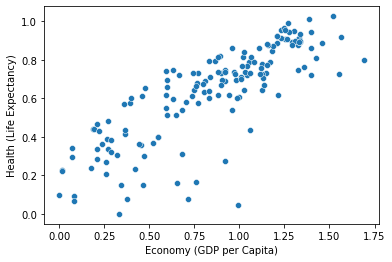

In [33]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Health (Life Expectancy)',data=data)
plt.show()

 - We can see that both features have linear relationship with each other.
 - So we will drop one of the feature while features selection.

## Checking Distribution of data

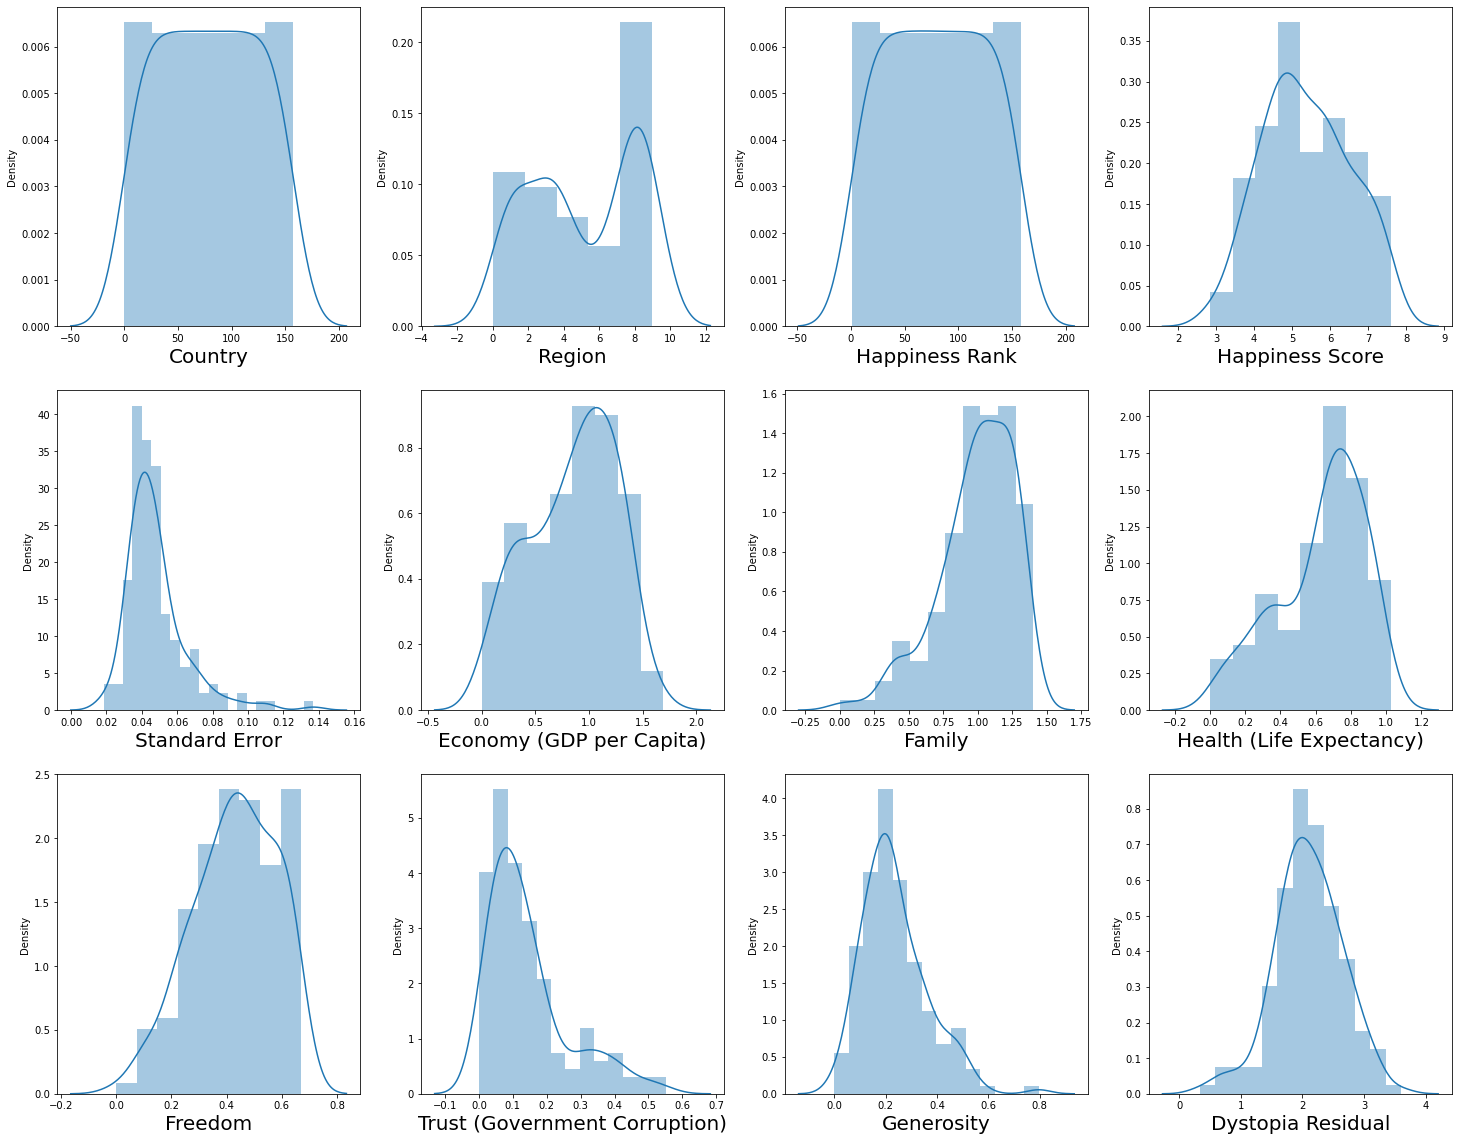

In [34]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

In [35]:
data.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

 - Outcome of the skewness: Skewness threshold is taken is +/-0.65.
 - From distribution almost all columns having skewness.
 - Except Country, Region, Happiness Rank but these are the categorical and ordinal data.

## Checking Outliers

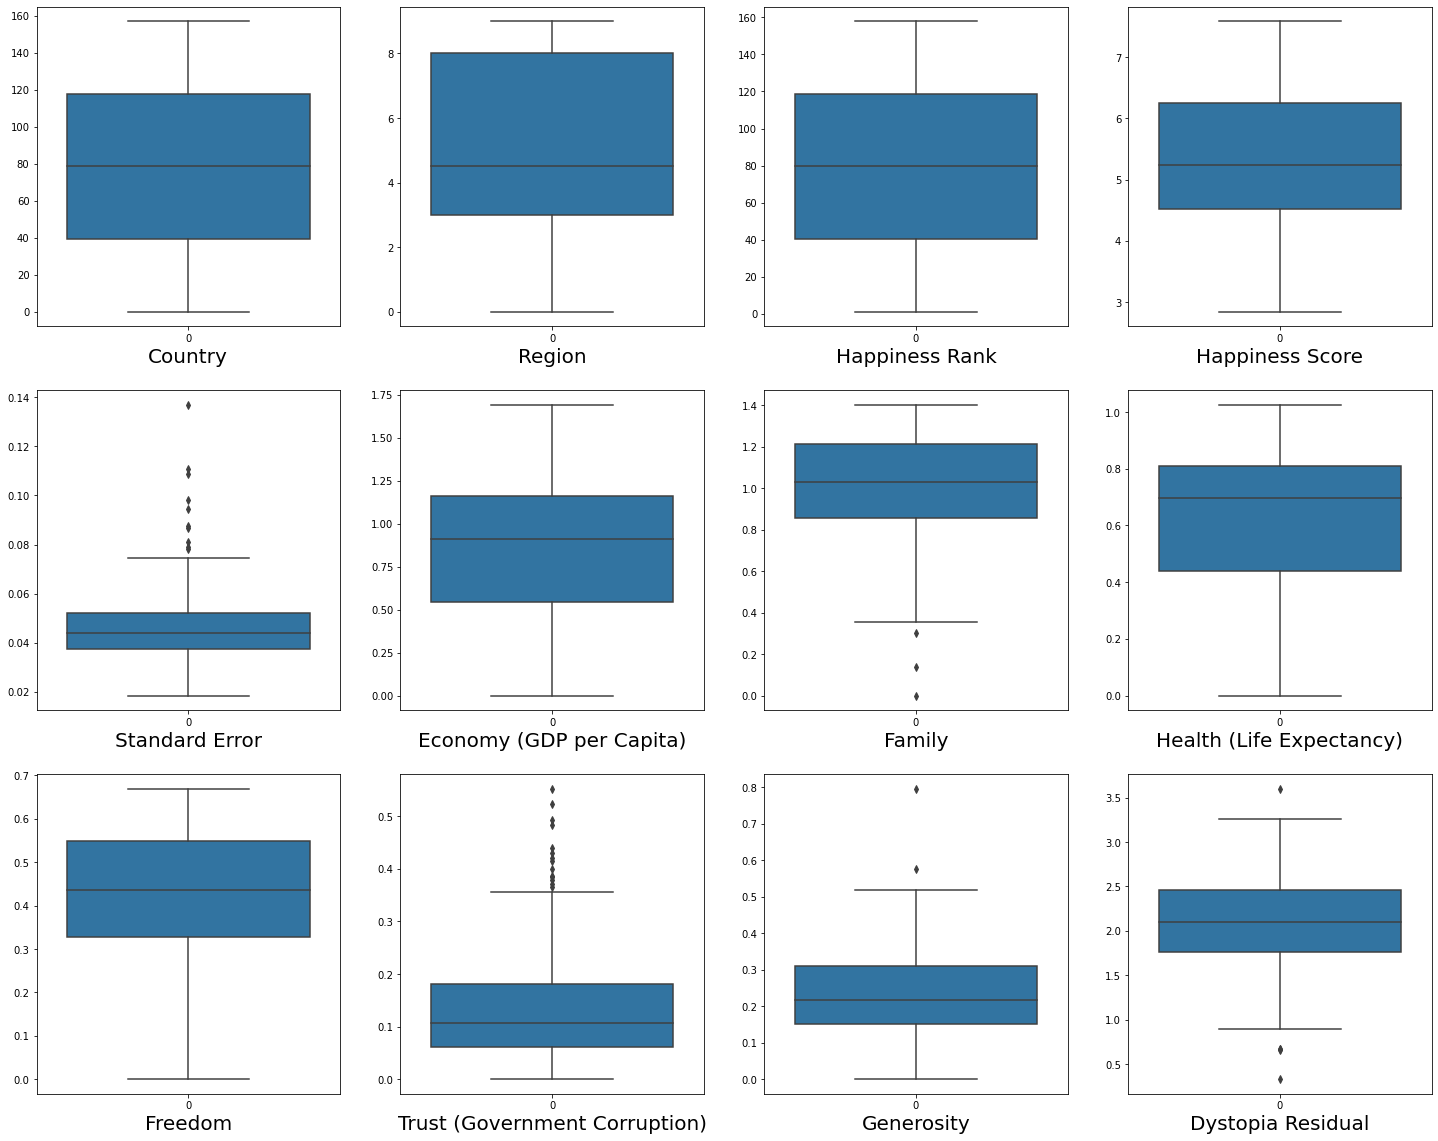

In [36]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        plt.subplot(3,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

 - From above outcome we can see that, the columns Standrad Error, Family, Trust (Goverment Corruption), Generosity, Dystopia Residual has outliers.
 - There is no outliers present in Happiness Score.

### Removing Outliers

In [37]:
from scipy.stats import zscore

z_score = zscore(data[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.067114,5.080537,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,45.833079,3.032519,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,0.000000,0.000000,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,38.000000,3.000000,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,76.000000,4.000000,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,116.000000,8.000000,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,9.000000,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


In [38]:
df.shape

(149, 12)

### Percentage of data loss

In [39]:
data_loss = ((158 - 149)/158*100)
print(data_loss,'%')

5.69620253164557 %


## Separating columns into features and label

In [40]:
x = df.drop(columns=['Happiness Score','Health (Life Expectancy)'],axis=1)
y = df['Happiness Score']

### Transforming the data for removing skewness

In [41]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [42]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354, -1.99584442, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966,  1.56626337, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966,  1.60111233, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [43]:
x.mean()  

2.384371596510403e-18

In [44]:
x.std()

1.0

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
lr = LinearRegression()

#### Finding Best Random State

In [47]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9975215289808591 on Random State 512


### Model Building

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=512)

In [49]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XG Boost Regressor' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [50]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,0.041,0.003,0.050692,0.998
Random Forest,0.032,0.002,0.042895,0.998
Gradient Boost Regressor,0.027,0.001,0.038547,0.999
XG Boost Regressor,0.065,0.007,0.083507,0.993


In [51]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,0.027000,0.001000,0.038547,0.999000
Linear Regression,0.041000,0.003000,0.050692,0.998000
Random Forest,0.032000,0.002000,0.042895,0.998000
XG Boost Regressor,0.065000,0.007000,0.083507,0.993000


## Cross - Validation of the model

In [52]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [53]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 85.90400989574127
accuracy_score is:- 99.7704077274514


At cv:- 5
Cross validation score is:- 77.06432998983954
accuracy_score is:- 99.7704077274514


At cv:- 6
Cross validation score is:- 67.04710027534642
accuracy_score is:- 99.7704077274514


At cv:- 7
Cross validation score is:- 53.902055942900496
accuracy_score is:- 99.7704077274514


At cv:- 8
Cross validation score is:- 50.00268596236953
accuracy_score is:- 99.7704077274514


At cv:- 9
Cross validation score is:- 43.57426020586099
accuracy_score is:- 99.7704077274514




In [54]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8590400989574127 
The accuracy score is:  0.9977040772745139


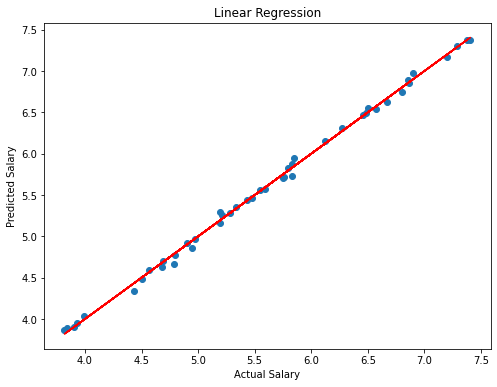

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression')
plt.show()

### Regularization

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [57]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.001, 'random_state': 0}

In [58]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

99.27013286883604

In [59]:
pred = r2_score(y_test,pred_ls)
pred*100

99.76797004994033

In [60]:
cv_score = cross_val_score(ls,x,y,cv = 4)
cv_mean = cv_score.mean()
cv_mean*100

86.44907581412298

## Conclusion

### By using Linear Regression, we are getting model accuracy as 99.8% which show our model is performing extremely well.

### Model save

In [61]:
import pickle
happiness = 'world_happiness_score.pkl'
pickle.dump(lr, open(happiness, 'wb'))